In [1]:
import requests, re, jieba
import jieba.analyse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from openpyxl import *
from PIL import Image
from bs4 import BeautifulSoup
from matplotlib import colors
from collections import Counter # 次數統計
from ckiptagger import WS
from snownlp import SnowNLP
# conda install -c conda-forge wordcloud=1.6.0 
from wordcloud import WordCloud, ImageColorGenerator

<html>
    <h1>爬蟲</h1>
</html>

In [2]:
title = []
urls = []

u = "https://www.setn.com/ViewAll.aspx?PageGroupID=0"

res = requests.get(u)
soup = BeautifulSoup(res.content, "lxml")
soup = soup.find_all("h3")

for i in range(len(soup)) :
    if soup[i].select("a")[0]["href"][0:6] == 'https:' :
        url = soup[i].select("a")[0]["href"]
    else :
        url = 'https://www.setn.com/' + soup[i].select("a")[0]["href"]
    urls.append(url)
    t = soup[i].select("a")[0].text
    title.append(t)

allcontent = []
index = []
num = 0
for u in urls:
    content = []
    res = requests.get(u)
    soup = BeautifulSoup(res.content, "lxml")

    try:
        if u[7:12] == '/star' :
            soup = soup.find("article", class_="printdiv")
        else :
            soup = soup.find("div", id ="Content1")

        for a in soup.find_all("p"):
            p = a.text
            check = 0
            for f in range(0, len(p)-1) :
                if p[f:f+2] == '圖／' or p[f] == '▲':
                    check = 1
            if check != 1 :
                content.append(p)
        content_str = ''
        for n in range(1, len(content)) :
            if content[n] != '' :
                content_str = content_str + ' ' + content[n]
        allcontent.append(content_str)
    except:
        index.append(num)
        pass
    num += 1
    
if len(urls) == len(title) == len(allcontent) :
    print('OK')
else :
    # 把有些爬不了的網站移除
    index.reverse()
    for i in range(len(index)) :
        urls.pop(index[i])
        title.pop(index[i])

OK


In [3]:
# 網址 + 標題 + 內文
for i in range(len(allcontent)) :
    print(urls[i] + '\n' + title[i] + '\n' + allcontent[i])
    print('--------------------------------------------------------------------------------------------------------------')

https://www.setn.com//News.aspx?NewsID=1129557&utm_campaign=viewallnews
中國禁台石斑魚　日媒：日本人愛吃魚
 中國近年來多次聲稱在台灣農產品檢出禁藥，藉此禁止台灣農產品進口，去年包含釋迦、蓮霧、鳳梨等水果都受到影響，沒想到這回中國盯上「石斑魚」，中國海關總署動植物檢疫司10日晚間發布通知，稱自6月13日起暫停受理台灣石斑魚報關，日本《產經新聞》台北支局長矢板明夫就建議，台灣應該提高產品魅力、打造自己的品牌，並提到「日本人是全世界最愛吃魚的民族」，認為台灣石斑魚在日本應該很有商機。 矢板明夫表示，石斑魚的產地，主要在屏東丶高雄等台灣南部地區，是民進黨支持者相對較多的地方，直言「北京當局或許想通過打壓相關業者，來影響11月的九合一選舉」。 至於石斑魚檢出有害物質的一說，矢板明夫不以為然，認為應該是無稽之談。提到「去年原本要出口到中國的鳳梨，因檢驗不合格被取消後，被大量轉銷到了日本，卻沒聽說過在日本海關查出什麼問題。難道，被稱為全世界最龜毛的日本質檢人員，都沒有在認真工作嗎？我不相信」。矢板明夫斷言，在鳳梨問題上，我敢斷定，一定是中方在故意刁難台灣。 至於石斑魚，矢板明夫表示台灣的養殖技術曾經是世界第一，但「隨著近年兩岸互動的增加，大量的技術外流」。現在中國的石斑魚養殖業的規模越來越大，甚至已經有一部分返銷回台灣市場。而高級鳳梨的種植技術也是從台灣傳到中國的。 他感嘆「回顧多年來的兩岸交流，台灣有很多值得反思的地方」。矢板明夫點出台灣還有很多產品也高度依賴中國市場，呼籲相關業者「應及時做好轉型的準備」。 至於台灣「護國群山」的半導體產業，矢板明夫認為暫時不用擔心。因為在技術上，中國國內的廠家很難模仿，今後還會繼續購買台灣的晶片，不過也說「台灣在技術外流問題上一定要格外小心」。 矢板明夫建議「台灣今後應該著力的，是提高產品的魅力、打造自己的品牌」。他以鳳梨為例，透露日本是鳳梨消費大國，95%靠進口，不過主要進口國是菲律賓和哥斯達黎加。目前台灣產的鳳梨價格偏高，認為「如果針對日本的高級市場開發出好的商品，還是很有成長空間的」。 最後台灣石斑魚接下來是否有機會外銷其他國家，矢板明夫笑稱「日本人是全世界最愛吃魚的民族，石斑魚在日本的潛在市場應該也不小，相信在這方面也是很有商機的」。
-------------

<html>
    <h1>標題前十大字彙(檢視出現最多的十個「字」是哪些)</h1>
</html>

In [4]:
# 去除標點符號+數字+英文字母的標題&文章
titles = str(title)
titles1 = ''.join(char for char in titles if char.isalnum())
titles2 = ''.join([i for i in titles1 if not i.isdigit()])
titles3 = re.sub('[a-zA-Z]','',titles2)

# 每個字出現次數
wordt = {}
for w in titles3:
    if w not in wordt:
        wordt[w] = 1
    else :    
        wordt[w] = wordt[w] + 1

In [5]:
sortwordt = sorted(wordt.items(), key = lambda x : x[1], reverse = True)[:10]
str_w = sortwordt[0][0]
for i in range(1, len(sortwordt)) :
    str_w = str_w + sortwordt[i][0]
print('三立新聞網標題前十大字彙為：' + str_w)

ETToday標題前十大字彙為：曝了人照不大網中台一


# 文字雲

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\acer\AppData\Local\Temp\jieba.cache
Loading model cost 0.999 seconds.
Prefix dict has been built successfully.


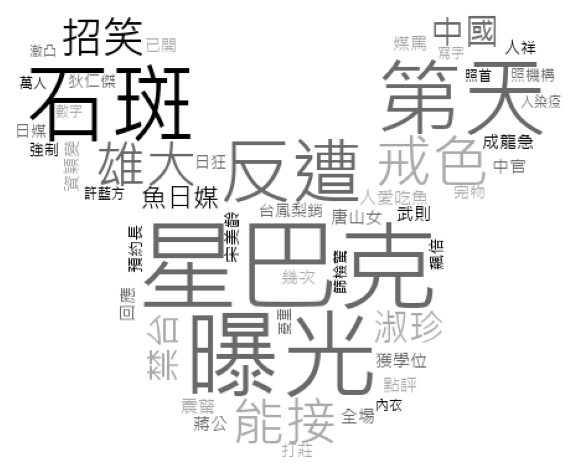

In [6]:
# 去除標點符號+數字+英文字母的標題&文章
titles1 = ''.join(char for char in str(title) if char.isalnum())
titles2 = ''.join([i for i in titles1 if not i.isdigit()])
titles = re.sub('[a-zA-Z]','',titles2)

tags = jieba.analyse.extract_tags(titles, topK=50, withWeight=True)
dictionary = {}
for i in range(len(tags)) :
    dictionary[tags[i][0]] = tags[i][1]

# 設定文字雲細項
color_list=['#000000','#A9A9A9','#696969']# 建立顏色數組，更改字體顏色
colormap=colors.ListedColormap(color_list)
fontpath = "C:/test-wordcloud/msjh.ttc"  # 字型檔
mask = np.array(Image.open("C:/mickey.png")) # 文字雲樣式
wordcloud = WordCloud(background_color="white", colormap=colormap, mask=mask, font_path=fontpath)
wc = wordcloud.generate_from_frequencies(dictionary)

plt.figure(figsize=(10,10))
plt.imshow(wc), plt.axis("off")
plt.show()

# 會存在下載中，注意檔名重複問題
wc.to_file('setn_wordcloud.jpg')

　　由於標題以較少字數概要的說明新聞內容，更需精簡選擇用字，因此比較不會出現代名詞、 虛字等功能性用字。另一個比較有趣的現象是各家單字前十名，皆包含「死」或「曝」。雖然現今新聞寫稿越來越嚴謹，但許多新聞為了吸引民眾的點閱來提高流量，使用較為誇張、聳動的字或詞。在這些用字和用詞下，乍看下讓你很想點進去看的標題，點進去後卻發現文不對題。時間一久，讀者會對該媒體產生不信任感。<br>

　　因此，我們使用文字探勘技術，以精確度來了解台灣網路媒體前三名新聞網標題用字和用詞與內文是否相符，另外，也透過情緒分析新聞網的立場是否中立，並依照分析出的結果來提供民眾選擇傾向的新聞風格。

#  平均精確度  --- 餘弦相似、相符合程度

In [7]:
# 剔除標點符號、數字及英文
stop_word01 = ['「', '」',' ' , '（' , '）' , '／'  , '：'  , '-' ,'，','。','\n','\r','！','\u3000', '？', '《', '》', '.']
def clearData(news , stop_words):
    result = ''
    re1 = re.sub('[a-zA-Z]','',news)
    for w in re1 :
        if w not in stop_words : 
            result = result + w 
    return result

# 內文
token_c=[]
for i in allcontent:
    token_c.append(clearData(i,stop_word01))

# 標題
token_t=[]
for i in title:
    token_t.append(clearData(i,stop_word01))

## CKIP斷詞

In [9]:
ws_title=[]
ws_content=[]
for i in range(len(token_t)) :
    title_text = token_t[i]
    content_text = token_c[i]
    
    ws = WS("C:\\Users\\acer\\Downloads\\data")
    
    ws_title.append(ws([title_text]))
    ws_content.append(ws([content_text]))

C:\Anaconda3\envs\Py38\lib\site-packages\ckiptagger\model_ws.py:106: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.LSTMCell(hidden_d, name=name)
C:\Anaconda3\envs\Py38\lib\site-packages\keras\layers\legacy_rnn\rnn_cell_impl.py:984: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  self._kernel = self.add_variable(
C:\Anaconda3\envs\Py38\lib\site-packages\keras\layers\legacy_rnn\rnn_cell_impl.py:993: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  self._bias = self.add_variable(


### Cosine Similarity(餘弦相似)，需要計算 A、B 兩向量的 dot 值、以及 A、B 兩向量的長度
#### - 夾角越大，代表兩個向量越是不像；
#### - 夾角越小，代表兩個向量越是相像
### Cosine Similarity值越大,標題與內文越相似

In [10]:
veclist_title=[]      # 標題內文向量存取陣列
veclist_content=[]

for a in range(len(ws_title)):
    countword={}      #統計標題斷詞在內文斷詞中出現次數
    for i in ws_title[a][0]:
        countword[i]=0
        for j in ws_content[a][0]:
            if i.__eq__(j):
                if i not in countword:
                        countword[i] = 1
                else:
                        countword[i] +=1
        
    vector_content=[]
    vector_title=[]
    for k,v in countword.items():
        vector_content.append(countword.get(k))     # content 次數向量
        vector_title.append(1)                      # title 次數向量 (因以標題為主要判斷出現次數之文字依據,故向量值皆為1
        
    veclist_content.append(vector_content)  # 加入標題內文向量存取陣列
    veclist_title.append(vector_title)    

In [11]:
CS = 0
Co0 = 0
for i in range(len(veclist_title)):
    # Dot and norm
    dot = sum(a*b for a, b in zip(veclist_content[i], veclist_title[i]))
    norm_a = sum(a*a for a in veclist_content[i]) ** 0.5
    norm_b = sum(b*b for b in veclist_title[i]) ** 0.5
    
    # Cosine similarity
    if norm_a == 0 or norm_b == 0 :
        cos_sim = 0
        Co0 += 1
    else :
        cos_sim = dot / (norm_a*norm_b)
    CS += cos_sim
    
avg_CS = CS / (len(veclist_title)-Co0)
print('三立新聞網餘弦相符合程度:', '%.2f%%' % (avg_CS * 100))

三立新聞網餘弦相符合程度: 62.95%


<html>
    <h1>情緒分析</h1>
</html>

In [12]:
text = str(allcontent)
stopword = ['，', '。', '、', '「', '」', '！', '；', '：']

index = [0] 
for i in range(len(text)) :
    if text[i] in stopword :
        index.append(i)
lines = []     
for i in range(len(index)-1) :
    start = index[i] + 1
    end = index[i+1]
    if len(text[start:end]) > 1 :
        lines.append(text[start:end])

values = []
for line in lines :
    values.append(SnowNLP(line).sentiments)

posi = 0
nega = 0
for i in values:
    if (i >= 0.5):
        posi += 1
    else:
        nega += 1

rate = posi / (posi+nega)
print('此新聞網正面用句的比例 : ','%.2f%%' % (rate * 100)) #格式化為百分比

此新聞網正面用句的比例 :  45.07%


# 將資料放進Excel

In [12]:
wb = load_workbook(r'C:\\Users\\acer\\OneDrive\\桌面\\daily information.xlsx')
ws = wb.active

num = int(input('這是第幾筆資料，例：1：'))

data1 = '%.2f%%' % (avg_CS * 100)
data2 = '%.2f%%' % (rate * 100)
data3 = str_w

ws.cell(num+2, 8, data1)
ws.cell(num+2, 9, data2)
ws.cell(num+2, 10, data3)

wb.save(r'C:\\Users\\acer\\OneDrive\\桌面\\daily information.xlsx')
print('done')

這是第幾筆資料，例：1：10
done


# 參考文獻

#### - https://blog.csdn.net/wangzirui32/article/details/118056830 
#### - https://clay-atlas.com/blog/2020/03/26/cosine-similarity-text-count/
#### - https://clay-atlas.com/blog/2019/09/24/python-chinese-tutorial-ckiptagger/
#### - https://blog.csdn.net/miaoxiaowuseng/article/details/107343427
#### - https://www.796t.com/content/1545012004.html
#### - https://pixnashpython.pixnet.net/blog/post/28128736-%E6%96%87%E5%AD%97%E9%9B%B2
#### - https://clay-atlas.com/blog/2019/09/24/python-chinese-tutorial-ckiptagger/
#### - http://csyue.nccu.edu.tw/ch/Taiwan%20Newspapers%20(2020).pdf
#### - https://blog.hashteacher.com/?p=1378
#### - https://www.webucator.com/article/python-color-constants-module/